# Project: Investigate a Dataset - Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This kaggle dataset contains information about 11 soccer leagues in 11 different European countries. The dataset contains data about more than 25,000 matches, and 10,000 players across the aforementioned 11 leagues as well as detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches. The dataset includes betting odds from 10 different providers.


### Question(s) for Analysis
> What is the average age and ability for players in europe?

> What players improved the most over the time period?

> What team attributes lead to the most points?

In [156]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



In [9]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [157]:
# Creating the dataframes needed for the analysis
df_league = pd.read_csv('League.csv')
df_match = pd.read_csv('Match.csv')
df_player = pd.read_csv('Player.csv')
df_player_attributes = pd.read_csv('Player_Attributes.csv')
df_team = pd.read_csv('Team.csv')
df_team_attributes = pd.read_csv('Team_Attributes.csv')


In [158]:
# the match dataframe has a lot of unnessasry/null columns
df_match.shape

(25979, 115)

In [159]:
df_match.isna().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

In [160]:
# the player attributes dataframe contains unnecessary information (we only need the player's rating)
df_player_attributes.head(1)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [161]:
#player attributes dataframe does not have player name
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [162]:
#team attributes dataframe does not have team names
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [163]:
# the match dataframe does not have team names nor the league names
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [164]:
# the date attribute is not of type datetime in the dataframes below
df_team_attributes['date'].dtype, df_player_attributes['date'].dtype, df_match['date'].dtype

(dtype('O'), dtype('O'), dtype('O'))

In [165]:
#the season is not specified in the player attributes or the team attributes dataframe
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [166]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [167]:
# there is no 'points' column in the match dataframe to indicate how many points each team got after each match
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [168]:
# the player attributes dataframe has null values
df_player_attributes['overall_rating'].isna().sum()

836

In [169]:
# the team attributes dataframe has null values in the buildUp Play Dribbling column
#(the value being null indicates that the attribute was not in the fifa game that season)
df_team_attributes.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64


## Data Cleaning
> The next section is dedicated to cleaning the data and improving the usability of the dataset
 

In [170]:
#removing unused columns in the match dataframe
df_match = df_match.iloc[:,:11]
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [171]:
#removing unused columns in the player attributes dataframe
df_player_attributes = df_player_attributes.iloc[:,:7]
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right


In [172]:
#adding player's name to the play attribute dataframe for better clarity
df_player_attributes = df_player.merge(df_player_attributes, left_on='player_api_id', right_on='player_api_id', how='inner')
# removing redundant columns
df_player_attributes.drop(columns = ['id_y','player_fifa_api_id_y'], inplace = True)

In [173]:
# renaming columns to look better
df_player_attributes.rename(columns = {'player_fifa_api_id_x':'player_fifa_api_id','id_x':'id'}, inplace = True)
df_player_attributes.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,preferred_foot
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right


In [174]:
# adding team names to the team attributes dataframe
df_team_attributes = df_team.merge(df_team_attributes, left_on='team_api_id', right_on='team_api_id', how='inner')
# removing redundant columns
df_team_attributes.drop(columns = ['id_y','team_fifa_api_id_y'], inplace = True)
# renaming columns to look better
df_team_attributes.rename(columns = {'team_fifa_api_id_x':'team_fifa_api_id','id_x':'id'}, inplace = True)

In [175]:
df_team_attributes.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,NaN,Little,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,NaN,Little,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,NaN,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,2013-09-20 00:00:00,58,Balanced,NaN,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,2014-09-19 00:00:00,58,Balanced,52.0,Normal,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [176]:
# merge the match and team dataframes, remove unwanted columns, and rearrange the columns
# merge:
df_match = df_match.merge(df_team, left_on = 'home_team_api_id', right_on = 'team_api_id', how = 'inner')
df_match = df_match.merge(df_team, left_on = 'away_team_api_id', right_on = 'team_api_id', how = 'inner')
df_match.head(1)

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,id_y,team_api_id_x,team_fifa_api_id_x,team_long_name_x,team_short_name_x,id,team_api_id_y,team_fifa_api_id_y,team_long_name_y,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC


In [177]:
# remove unwanted columns and rename some others
df_match.drop(columns = ['id_y','team_api_id_x','team_fifa_api_id_x','id','team_api_id_y','team_fifa_api_id_y','team_short_name_x','team_short_name_y'], inplace = True)
df_match.rename(columns = {'id_x':'id','team_long_name_x':'home_team_name','team_long_name_y':'away_team_name'}, inplace = True)
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name,away_team_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,KRC Genk,Beerschot AC


In [178]:
#rearrange columns
away_teams = df_match.pop("away_team_name")
df_match.insert(9,'away_team_name',away_teams)
home_teams = df_match.pop('home_team_name')
df_match.insert(8,'home_team_name',home_teams)

In [179]:
#test
df_match.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,home_team_name,away_team_api_id,away_team_name,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,KRC Genk,9993,Beerschot AC,1,1


In [180]:
# merge the match and league dataframes, remove unwanted columns, and rearrange the columns
# merge
df_match = df_match.merge(df_league, left_on = 'league_id', right_on = 'id', how = 'inner')

In [181]:
# remove unwanted columns and rename some others
df_match.drop(columns = ['id_y','country_id_y'], inplace = True)
df_match.rename(columns = {'id_x':'id','country_id_x':'country_id'}, inplace = True)

In [182]:
# rearrange columns
name = df_match.pop('name')
df_match.insert(3, 'league_name',name)

In [183]:
# test
df_match.head(1)

,id,country_id,league_id,league_name,season,stage,date,match_api_id,home_team_api_id,home_team_name,away_team_api_id,away_team_name,home_team_goal,away_team_goal
0,1,1,1,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,9987,KRC Genk,9993,Beerschot AC,1,1


In [184]:
# change the datatype of the date and birthday columns in different dataframes
df_match['date'] = pd.to_datetime(df_match['date'])
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])
df_team_attributes['date'] = pd.to_datetime(df_team_attributes['date'])
df_player_attributes['birthday'] = pd.to_datetime(df_player_attributes['birthday'])

In [185]:
# write a function to get a season based on the date (a soccer season starts in late july and ends in early june according to google)
def date_to_season (time):
    """this function takes a datetime object as a parameter and returns the season in which this date falls in"""
    if time.month <= 6:
        return str(time.year - 1) + "/" + str(time.year)
    else:
        return str(time.year) + "/" + str(time.year + 1)

In [186]:
df_player_attributes['season'] = df_player_attributes['date'].apply(lambda x : date_to_season(x))
df_team_attributes['season'] = df_team_attributes['date'].apply(lambda x : date_to_season(x))

In [187]:
# add 2 columns for points in the match dataframe (one column for the home team points and the other for the away team points)
df_match ['home_team_points'] =''
df_match ['away_team_points'] =''

In [188]:
# fill the points columns with appropriate values
df_match.loc[df_match.home_team_goal == df_match.away_team_goal, ['home_team_points','away_team_points']] = 1, 1
df_match.loc[df_match.home_team_goal > df_match.away_team_goal, ['home_team_points','away_team_points']] = 3, 0
df_match.loc[df_match.home_team_goal < df_match.away_team_goal, ['home_team_points','away_team_points']] = 0, 3


df_match.head()

,id,country_id,league_id,league_name,season,stage,date,match_api_id,home_team_api_id,home_team_name,away_team_api_id,away_team_name,home_team_goal,away_team_goal,home_team_points,away_team_points
0,1,1,1,Belgium Jupiler League,2008/2009,1,2008-08-17,492473,9987,KRC Genk,9993,Beerschot AC,1,1,1,1
1,483,1,1,Belgium Jupiler League,2009/2010,5,2009-08-30,665353,9987,KRC Genk,9993,Beerschot AC,1,1,1,1
2,524,1,1,Belgium Jupiler League,2010/2011,1,2010-08-01,838476,9987,KRC Genk,9993,Beerschot AC,2,1,3,0
3,759,1,1,Belgium Jupiler League,2011/2012,1,2011-07-30,1032694,9987,KRC Genk,9993,Beerschot AC,3,1,3,0
4,1014,1,1,Belgium Jupiler League,2012/2013,11,2012-10-20,1224064,9987,KRC Genk,9993,Beerschot AC,3,0,3,0


In [189]:
# drop null values from the player attribute dataframe
df_player_attributes.dropna(inplace = True)

In [190]:
# replacing NaN values in the team attributes dataframe
df_team_attributes.fillna('N/A',inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis



### Player/Team Data Exploration.

In [191]:
# in the first section we will perform an exploratory analysis of the players ages and overall ratings across europe
# get the precise player age
today = datetime.datetime.today()
age =  df_player_attributes['birthday'].apply(lambda t : today.year - t.year - ((today.month, today.day) < (t.month, t.day)))
df_player_attributes.insert(7,'age',age)
df_player.insert(7,'age',age)

In [192]:
df_player_attributes.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age,date,overall_rating,potential,preferred_foot,season
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,29,2016-02-18,67.0,71.0,right,2015/2016
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,29,2015-11-19,67.0,71.0,right,2015/2016
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,29,2015-09-21,62.0,66.0,right,2015/2016
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,29,2015-03-20,61.0,65.0,right,2014/2015
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,29,2007-02-22,61.0,65.0,right,2006/2007
5,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,31,2016-04-21,74.0,76.0,left,2015/2016
6,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,31,2016-04-07,74.0,76.0,left,2015/2016
7,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,31,2016-01-07,73.0,75.0,left,2015/2016
8,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,31,2015-12-24,73.0,75.0,left,2015/2016
9,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,31,2015-12-17,73.0,75.0,left,2015/2016


In [193]:
# stats on players' height, weight, and age
df_player[['height','weight','age']].describe()

,height,weight,age
count,11060.000000,11060.000000,11021.000000
mean,181.867445,168.380289,33.113964
std,6.369201,14.990217,4.718836
min,157.480000,117.000000,22.000000
25%,177.800000,159.000000,30.000000
50%,182.880000,168.000000,32.000000
75%,185.420000,179.000000,36.000000
max,208.280000,243.000000,54.000000


In [194]:
# stats on players' overall rating
df_player_attributes.overall_rating.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

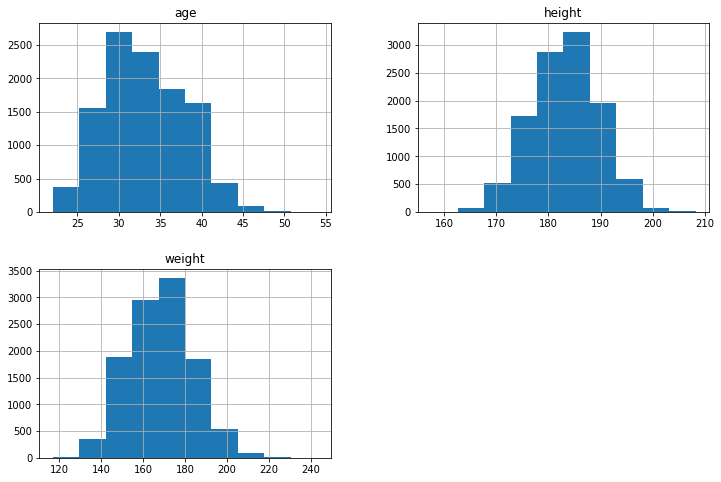

In [195]:
# players' height, weight, and age histograms
df_player[['height','weight','age']].hist(figsize = (12,8));

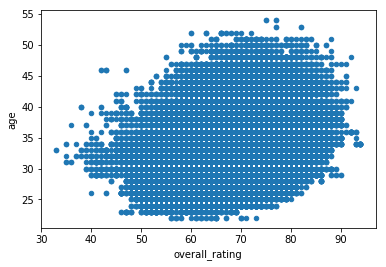

In [196]:
# players' overall rating scatter plot
df_player_attributes.plot(x = 'overall_rating', y = 'age',kind = 'scatter');

In [197]:
# team attributes stats
df_team_attributes.describe()

,id,team_api_id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,22692.858711,9995.727023,17706.982167,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,15015.159107,13264.869900,39179.857739,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1601.000000,1.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,9547.250000,8457.750000,110.000000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,20524.500000,8674.000000,485.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,35294.000000,9904.000000,1900.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,50204.000000,274581.000000,112513.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


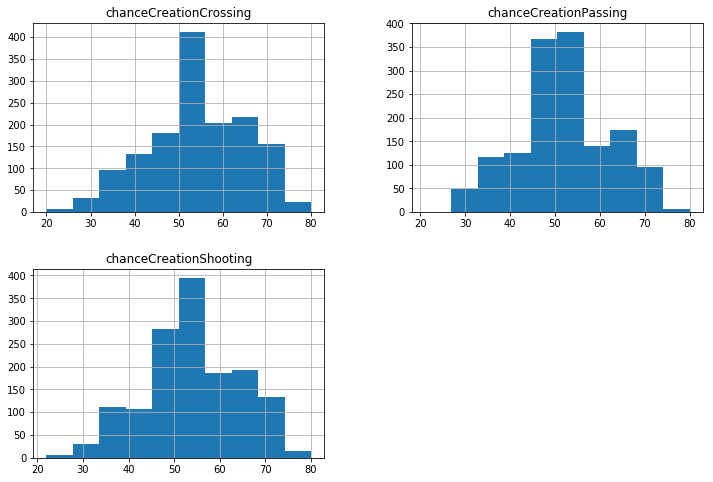

In [198]:
# team chance creation strategy plot
df_team_attributes[['chanceCreationPassing','chanceCreationCrossing','chanceCreationShooting']].hist(figsize=(12,8));

<a id='eda'></a>
> we notice from the graphs and the info above that:

> The age is right skewed with most players aging between 25 and 40 years with the average age being 39.9 years.

> The height is normally distributed with the mean height being 181.8.

> The weight is slightly right skewed with the mean weight being 168.38.

> The mean rating of a soccer player in FIFA is approximately 68.6 and young players (under 25) tend to be lower rated on average
> most teams prefer a balanced chance creation strategy.

### What players improved the most over the time period?

> Flow of analysis:

> Find out which players improved the most.

> Compare the most improved player's results with the average improvement.

> Plot a graph to see how the player improved through the time period.

In [199]:
# define a function to get the difference in player ratings over the time period
def player_rating(api_id):
    """this function takes the player's id (int64)
    returns the increase or decrease of the player's FIFA rating over the time period"""
    player_rating = df_player_attributes.query('player_api_id == {}'.format(api_id)).groupby('season')["overall_rating"].mean()
    return player_rating.max() - player_rating.min()


In [200]:
# applying the function to the player api id column of the player dataframe to get the players' rating differnce
#this cell takes about a minute to execute
df_player['rating_diff'] = df_player['player_api_id'].apply(lambda x : player_rating(x))

In [201]:
# sorting the values by rating difference to view to top players
df_player.sort_values('rating_diff', ascending = False, inplace = True)
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age,rating_diff
6715,6725,129944,Marco Reus,188350,1989-05-31 00:00:00,180.34,165,27.0,42.000000
3460,3464,41841,Francesco Della Rocca,178043,1987-09-14 00:00:00,182.88,161,27.0,39.000000
2835,2838,107417,Eden Hazard,183277,1991-01-07 00:00:00,172.72,163,33.0,37.666667
8915,8929,115591,Ricardo Rodriguez,193352,1992-08-25 00:00:00,180.34,170,31.0,37.666667
8696,8710,41433,Radja Nainggolan,178518,1988-05-04 00:00:00,175.26,143,31.0,37.000000


In [202]:
# rating difference stats
df_player['rating_diff'].describe()

count    11060.000000
mean         8.455834
std          6.318306
min          0.000000
25%          4.000000
50%          7.500000
75%         12.000000
max         42.000000
Name: rating_diff, dtype: float64

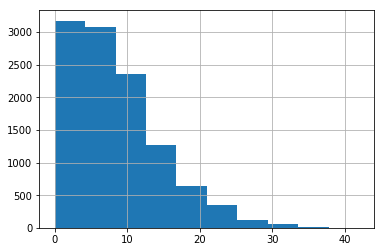

In [203]:
# rating difference histograms
df_player['rating_diff'].hist()

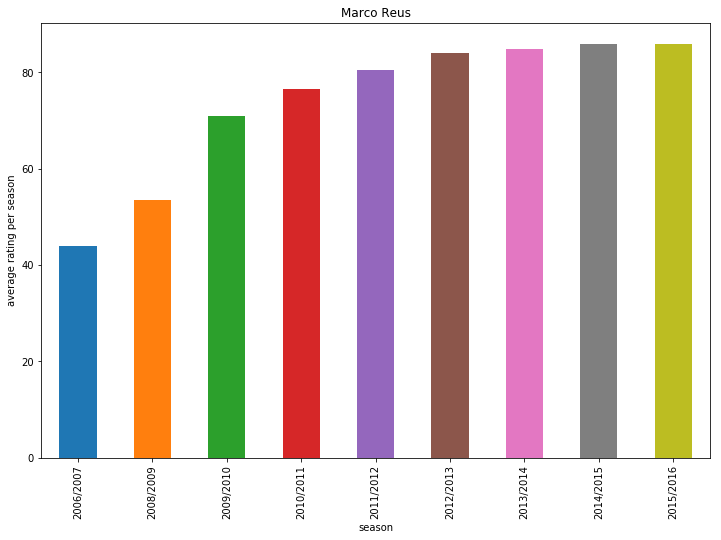

In [204]:
# reus's rating evolution
reus = df_player_attributes.query('player_api_id == 129944').groupby('season')['overall_rating'].mean()
reus.plot(kind="bar", title="Marco Reus",figsize=(12,8)).set_ylabel("average rating per season");

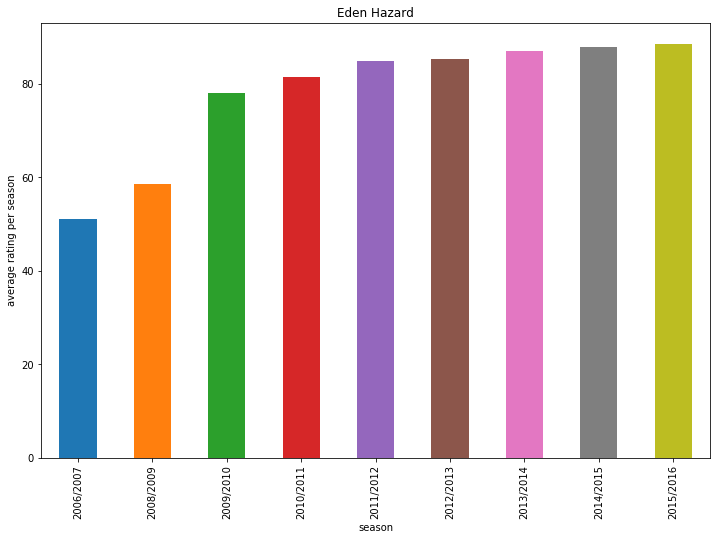

In [205]:
# hazard's rating evolution
hazard = df_player_attributes.query('player_api_id == 107417').groupby('season')['overall_rating'].mean()
hazard.plot(kind="bar", title="Eden Hazard",figsize=(12,8)).set_ylabel("average rating per season");


> The data above shows that the most improved player is Marco Reus with a rating increase of 42.

> The mean player improvement is 8.45.

> The histogram of the players' improvement is right skewed meaning that players who experience a 20+ points rating increase are very few.


### Which Team attributes led to the most points?

> Flow of analysis:

> Find out which teams got the most points. 

> Find out the common attributes between the teams.

> Try to see which attributes are common among the top teams.

In [206]:
# define a function to calculate the team overall points
def team_tot_points(api_id):
    """this function takes the team id (int64)
    returns the number of points the team got each season"""
    home_points = df_match.query('home_team_api_id == {}'.format(api_id)).groupby('season')["home_team_points"].sum()
    away_points = df_match.query('away_team_api_id == {}'.format(api_id)).groupby('season')["away_team_points"].sum()
    return home_points + away_points

In [207]:
# getting each team's point tally every season
df_points = df_team['team_api_id'].apply(lambda x : team_tot_points(x))

In [208]:
# there are a lot of null values (especially in the 2013/14 column) and the columns are out of order
df_points.head(10)

,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2014/2015,2015/2016,2013/2014
0,50.0,34.0,64.0,46.0,55.0,49.0,48.0,NaN
1,42.0,35.0,26.0,36.0,23.0,NaN,NaN,NaN
2,55.0,41.0,33.0,30.0,63.0,31.0,43.0,NaN
3,51.0,18.0,50.0,44.0,51.0,42.0,34.0,NaN
4,47.0,38.0,39.0,46.0,14.0,24.0,NaN,NaN
5,77.0,69.0,65.0,67.0,67.0,57.0,55.0,NaN
6,59.0,49.0,57.0,56.0,34.0,57.0,60.0,10.0
7,19.0,NaN,NaN,36.0,44.0,NaN,NaN,NaN
8,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,77.0,39.0,49.0,51.0,50.0,53.0,41.0,NaN


In [209]:
# fill the null values with the mean points of each team
mean_points = df_points.mean(axis = 1).round()
df_points = df_points.fillna({x:mean_points for x in df_points.columns})
df_points.head(10)

,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2014/2015,2015/2016,2013/2014
0,50.0,34.0,64.0,46.0,55.0,49.0,48.0,49.0
1,42.0,35.0,26.0,36.0,23.0,32.0,32.0,32.0
2,55.0,41.0,33.0,30.0,63.0,31.0,43.0,42.0
3,51.0,18.0,50.0,44.0,51.0,42.0,34.0,41.0
4,47.0,38.0,39.0,46.0,14.0,24.0,35.0,35.0
5,77.0,69.0,65.0,67.0,67.0,57.0,55.0,65.0
6,59.0,49.0,57.0,56.0,34.0,57.0,60.0,10.0
7,19.0,33.0,33.0,36.0,44.0,33.0,33.0,33.0
8,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
9,77.0,39.0,49.0,51.0,50.0,53.0,41.0,51.0


In [210]:
# rearrange the columns
season = df_points.pop('2013/2014')
df_points.insert(5,'2013/2014',season)
df_points.head()

,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
0,50.0,34.0,64.0,46.0,55.0,49.0,49.0,48.0
1,42.0,35.0,26.0,36.0,23.0,32.0,32.0,32.0
2,55.0,41.0,33.0,30.0,63.0,42.0,31.0,43.0
3,51.0,18.0,50.0,44.0,51.0,41.0,42.0,34.0
4,47.0,38.0,39.0,46.0,14.0,35.0,24.0,35.0


In [211]:
# add a total points column to see which team got the most points
df_points['total_points'] = df_points.sum(axis = 1)
df_points.head()

,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016,total_points
0,50.0,34.0,64.0,46.0,55.0,49.0,49.0,48.0,395.0
1,42.0,35.0,26.0,36.0,23.0,32.0,32.0,32.0,258.0
2,55.0,41.0,33.0,30.0,63.0,42.0,31.0,43.0,338.0
3,51.0,18.0,50.0,44.0,51.0,41.0,42.0,34.0,331.0
4,47.0,38.0,39.0,46.0,14.0,35.0,24.0,35.0,278.0


In [212]:
# add the points dataframe to the team dataframe
df_team = pd.concat([df_team, df_points], axis = 1)
df_team.head(1)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016,total_points
0,1,9987,673.0,KRC Genk,GEN,50.0,34.0,64.0,46.0,55.0,49.0,49.0,48.0,395.0


In [213]:
# which team scored the most points
df_team_sorted = df_team.sort_values('total_points', ascending = False)
df_team_sorted.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016,total_points
258,43042,8634,241.0,FC Barcelona,BAR,87.0,99.0,96.0,91.0,100.0,87.0,94.0,91.0,745.0
256,43040,8633,243.0,Real Madrid CF,REA,78.0,96.0,92.0,100.0,85.0,87.0,92.0,90.0,720.0
242,39395,9925,78.0,Celtic,CEL,82.0,81.0,92.0,93.0,79.0,99.0,92.0,86.0,704.0
235,39388,8548,86.0,Rangers,RAN,86.0,87.0,93.0,83.0,87.0,87.0,87.0,87.0,697.0
133,20522,9885,45.0,Juventus,JUV,74.0,55.0,58.0,79.0,87.0,102.0,87.0,91.0,633.0


In [214]:
df_team['total_points'].mean()

345.95317725752506

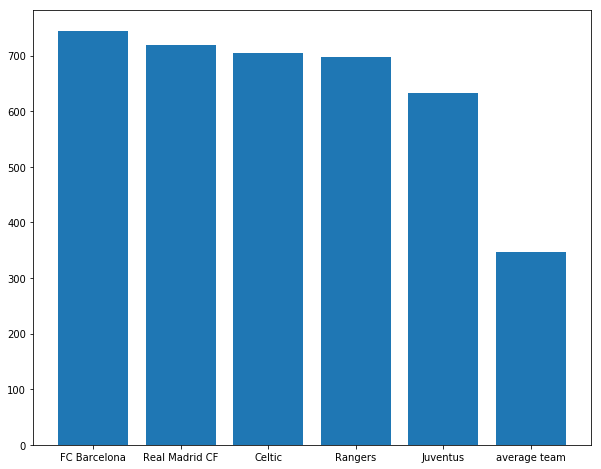

In [215]:
# explore the top teams' points compared to the mean
fig = plt.figure(figsize=(10,8))
team_list = [] 
label = ["FC Barcelona","Real Madrid CF","Celtic","Rangers","Juventus","average team"]
# barcelona
bar = df_team.query('team_api_id == 8634')['total_points']
team_list.append(bar)
# real madrid
rea = df_team.query('team_api_id == 8633')['total_points']
team_list.append(rea)
# celtic
cel = df_team.query('team_api_id == 9925')['total_points']
team_list.append(cel)
# rangers
ran = df_team.query('team_api_id == 8548')['total_points']
team_list.append(ran)
# juventus
juv = df_team.query('team_api_id == 9885')['total_points']
team_list.append(juv)
# average team stats
mean = df_team['total_points'].mean()
team_list.append(mean)
plt.bar([1,2,3,4,5,6], team_list, tick_label = label);

In [216]:
# barcelona's attribute/ playing style
df_team_attributes.query('team_api_id == 8634').mean() < df_team_attributes.mean()

id                        False
team_api_id                True
team_fifa_api_id           True
buildUpPlaySpeed           True
buildUpPlayPassing         True
chanceCreationPassing      True
chanceCreationCrossing     True
chanceCreationShooting     True
defencePressure           False
defenceAggression         False
defenceTeamWidth          False
dtype: bool

In [217]:
# real madrid attribute/ playing style
df_team_attributes.query('team_api_id == 8633').mean() < df_team_attributes.mean()

id                        False
team_api_id                True
team_fifa_api_id           True
buildUpPlaySpeed           True
buildUpPlayPassing         True
chanceCreationPassing     False
chanceCreationCrossing    False
chanceCreationShooting    False
defencePressure           False
defenceAggression         False
defenceTeamWidth          False
dtype: bool

In [218]:
# celtic attribute/ playing style
df_team_attributes.query('team_api_id == 9925').mean() < df_team_attributes.mean()

id                        False
team_api_id                True
team_fifa_api_id           True
buildUpPlaySpeed          False
buildUpPlayPassing        False
chanceCreationPassing     False
chanceCreationCrossing    False
chanceCreationShooting    False
defencePressure           False
defenceAggression         False
defenceTeamWidth          False
dtype: bool

> The data above shows that the team which scored the most points is FC Barcelona with 745 points.

> The mean team total points is 346 points.

> the shared playing strategy among the top 3 teams is:

> 1- Defence Pressure is higher than the mean.

> 2- Defence Aggression is higher than the mean.

> 3- Defence Team Width is higher than the mean.

> This indicated that the top 3 teams are more attacking focused but they slightly differ in the chance creation section.

> The attributes that get the most points are the ones set to a more attack focus strategy (especially in Celtic where 
all the attributes values are higher than the mean which indicates a more aggresive attacking strategy). 

<a id='conclusions'></a>
## Conclusions

### Analysis overview

> The analysis went through these steps:

> 1- Exploring the data : veiwing the columns, null values and understanding the data.

> 2- After identifying any issues with the data we resolved these issues during the data cleaning step.

> 3- After dealing with null values and making the data easier to analyse, the data is suitable for analysis.

> 4- We asked and answered some questions on the data regarding the teams and players.

### Findings

> After analyzing the data and answering some questions we find that:

> The age is right skewed with most players aging between 25 and 40 years with the average age being 39.9 years.

> The mean rating of a soccer player in FIFA is approximately 68.6 and young players (under 25) tend to be lower rated on average

> most teams prefer a balanced chance creation strategy.

> The most improved player is Marco Reus with a rating increase of 42.

> The mean player improvement is 8.45.

> The team which scored the most points is FC Barcelona with 745 points.

> The mean team total points is 346 points.

> The top 3 teams are more attacking focused but they slightly differ in the chance creation section.

> The attributes that get the most points are the ones set to a more attack focus strategy (especially in Celtic where 
all the attributes values are higher than the mean which indicates a more aggresive attacking strategy)

> More data would be useful such as the teams ratings in the FIFA game.

> Data from the european competitions such as the UEFA Champions League would be more helpful as all the top teams face each other in this competition.



### Limitations
> There are a lot of missing data in this data set such as the match data and especially the 2013/2014 season which affects the point total.

> The 2007/2008 and 2016/17 season is missing for players such as Eden Hazard and Marco Reus.

> I filled the missing values in the points columns based on each teams performance in the seasons before and after the missing season/s.

> I did not do the same for the players rating column, because the research focused on the total player rating improvement, and we don't know if a player's rating will increase or decrease in the future.

> Since I play FIFA (the game from which most of the data was brought) I know that the team's playing strategy in FIFA do not accurately resemble how teams play like in real life.


